#### tf.Variable()
x = tf.Variable(5)<br>

The tf.Variable class creates a tensor with an initial value that can be modified, much like a normal Python variable. This tensor stores its state in the session, so you must initialize the state of the tensor manually. You'll use the tf.global_variables_initializer() function to initialize the state of all the Variable tensors.<br>

####  Initialization
> init = tf.global_variables_initializer()

The tf.global_variables_initializer() call returns an operation that will initialize all TensorFlow variables from the graph. You call the operation using a session to initialize all the variables as shown above. Using the tf.Variable class allows us to change the weights and bias, but an initial value needs to be chosen.<br>

Initializing the weights with random numbers from a normal distribution is good practice. Randomizing the weights helps the model from becoming stuck in the same place every time you train it. You'll learn more about this in the next lesson, when you study gradient descent.<br>

Similarly, choosing weights from a normal distribution prevents any one weight from overwhelming other weights. You'll use the tf.truncated_normal() function to generate random numbers from a normal distribution.<br>

#### tf.truncated_normal()
>n_features = 120
 n_labels = 5
 weights = tf.Variable(tf.truncated_normal((n_features, n_labels)))

The tf.truncated_normal() function returns a tensor with random values from a normal distribution whose magnitude is no more than 2 standard deviations from the mean.<br>

Since the weights are already helping prevent the model from getting stuck, you don't need to randomize the bias. Let's use the simplest solution, setting the bias to 0.<br>

#### tf.zeros()
> n_labels = 5
bias = tf.Variable(tf.zeros(n_labels))

The tf.zeros() function returns a tensor with all zeros.

In [3]:
# Quiz Solution
# Note: You can't run code in this tab
import tensorflow as tf

def get_weights(n_features, n_labels):
    """
    Return TensorFlow weights
    :param n_features: Number of features
    :param n_labels: Number of labels
    :return: TensorFlow weights
    """
    # TODO: Return weights
    return tf.Variable(tf.truncated_normal((n_features, n_labels)))


def get_biases(n_labels):
    """
    Return TensorFlow bias
    :param n_labels: Number of labels
    :return: TensorFlow bias
    """
    # TODO: Return biases
    return tf.Variable(tf.zeros(n_labels))


def linear(input, w, b):
    """
    Return linear function in TensorFlow
    :param input: TensorFlow input
    :param w: TensorFlow weights
    :param b: TensorFlow biases
    :return: TensorFlow linear function
    """
    # TODO: Linear Function (xW + b)
    return tf.add(tf.matmul(input, w), b)

In [5]:
import tensorflow as tf
# Sandbox Solution
# Note: You can't run code in this tab
from tensorflow.examples.tutorials.mnist import input_data


def mnist_features_labels(n_labels):
    """
    Gets the first <n> labels from the MNIST dataset
    :param n_labels: Number of labels to use
    :return: Tuple of feature list and label list
    """
    mnist_features = []
    mnist_labels = []

    mnist = input_data.read_data_sets('/datasets/ud730/mnist', one_hot=True)

    # In order to make quizzes run faster, we're only looking at 10000 images
    for mnist_feature, mnist_label in zip(*mnist.train.next_batch(10000)):

        # Add features and labels if it's for the first <n>th labels
        if mnist_label[:n_labels].any():
            mnist_features.append(mnist_feature)
            mnist_labels.append(mnist_label[:n_labels])

    return mnist_features, mnist_labels


# Number of features (28*28 image is 784 features)
n_features = 784
# Number of labels
n_labels = 3

# Features and Labels
features = tf.placeholder(tf.float32)
labels = tf.placeholder(tf.float32)

# Weights and Biases
w = get_weights(n_features, n_labels)
b = get_biases(n_labels)

# Linear Function xW + b
logits = linear(features, w, b)

# Training data
train_features, train_labels = mnist_features_labels(n_labels)

with tf.Session() as session:
    session.run(tf.global_variables_initializer())

    # Softmax
    prediction = tf.nn.softmax(logits)

    # Cross entropy
    # This quantifies how far off the predictions were.
    # You'll learn more about this in future lessons.
    cross_entropy = -tf.reduce_sum(labels * tf.log(prediction), reduction_indices=1)

    # Training loss
    # You'll learn more about this in future lessons.
    loss = tf.reduce_mean(cross_entropy)

    # Rate at which the weights are changed
    # You'll learn more about this in future lessons.
    learning_rate = 0.08

    # Gradient Descent
    # This is the method used to train the model
    # You'll learn more about this in future lessons.
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

    # Run optimizer and get loss
    _, l = session.run(
        [optimizer, loss],
        feed_dict={features: train_features, labels: train_labels})

# Print loss
print('Loss: {}'.format(l))

PermissionDeniedError: /datasets; Permission denied

#### TensorFlow Softmax

The softmax function squashes it's inputs, typically called logits or logit scores, to be between 0 and 1 and also normalizes the outputs such that they all sum to 1. This means the output of the softmax function is equivalent to a categorical probability distribution. It's the perfect function to use as the output activation for a network predicting multiple classes.

#### TensorFlow Softmax

We're using TensorFlow to build neural networks and, appropriately, there's a function for calculating softmax.



In [8]:
# Solution is available in the other "solution.py" tab
import tensorflow as tf


def run():
    output = None
    logit_data = [2.0, 1.0, 0.1]
    logits = tf.placeholder(tf.float32)
    
    # TODO: Calculate the softmax of the logits
    # softmax =     
    
    with tf.Session() as sess:
        pass
        # TODO: Feed in the logit data
        # output = sess.run(softmax,    )
    return output

In [9]:
# Quiz Solution
# Note: You can't run code in this tab
import tensorflow as tf


def run():
    output = None
    logit_data = [2.0, 1.0, 0.1]
    logits = tf.placeholder(tf.float32)

    softmax = tf.nn.softmax(logits)

    with tf.Session() as sess:
        output = sess.run(softmax, feed_dict={logits: logit_data})

    return output


### Cross entropy

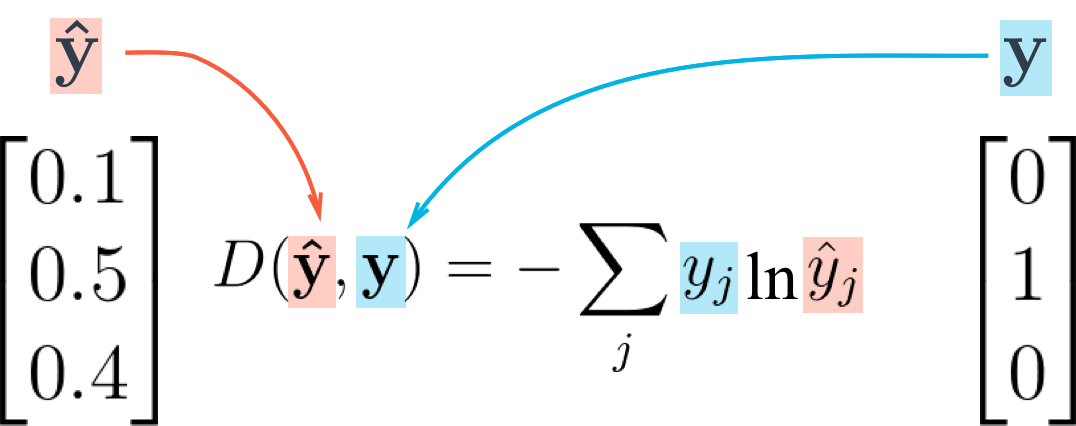

### Reduce Sum
x = tf.reduce_sum([1, 2, 3, 4, 5])  # 15<br>
The tf.reduce_sum() function takes an array of numbers and sums them together.

### Natural Log
x = tf.log(100.0)  # 4.60517 <br>
This function does exactly what you would expect it to do. tf.log() takes the natural log of a number.

In [10]:
# Solution is available in the other "solution.py" tab
import tensorflow as tf

softmax_data = [0.7, 0.2, 0.1]
one_hot_data = [1.0, 0.0, 0.0]

softmax = tf.placeholder(tf.float32)
one_hot = tf.placeholder(tf.float32)

# TODO: Print cross entropy from session


In [11]:
# Quiz Solution
# Note: You can't run code in this tab
import tensorflow as tf

softmax_data = [0.7, 0.2, 0.1]
one_hot_data = [1.0, 0.0, 0.0]

softmax = tf.placeholder(tf.float32)
one_hot = tf.placeholder(tf.float32)

# ToDo: Print cross entropy from session
cross_entropy = -tf.reduce_sum(tf.multiply(one_hot, tf.log(softmax)))

with tf.Session() as sess:
    print(sess.run(cross_entropy, feed_dict={softmax: softmax_data, one_hot: one_hot_data}))


0.35667497


## Mini-batch

In [12]:
import math
def batches(batch_size, features, labels):
    """
    Create batches of features and labels
    :param batch_size: The batch size
    :param features: List of features
    :param labels: List of labels
    :return: Batches of (Features, Labels)
    """
    assert len(features) == len(labels)
    # TODO: Implement batching
    output_batches = []
    
    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        output_batches.append(batch)
        
    return output_batches


------

In [14]:
import math
def batches(batch_size, features, labels):
    """
    Create batches of features and labels
    :param batch_size: The batch size
    :param features: List of features
    :param labels: List of labels
    :return: Batches of (Features, Labels)
    """
    assert len(features) == len(labels)
    outout_batches = []
    
    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        outout_batches.append(batch)
        
    return outout_batches


In [15]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np

learning_rate = 0.001
n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

# Import MNIST data
mnist = input_data.read_data_sets('/datasets/ud730/mnist', one_hot=True)

# The features are already scaled and the data is shuffled
train_features = mnist.train.images
test_features = mnist.test.images

train_labels = mnist.train.labels.astype(np.float32)
test_labels = mnist.test.labels.astype(np.float32)

# Features and Labels
features = tf.placeholder(tf.float32, [None, n_input])
labels = tf.placeholder(tf.float32, [None, n_classes])

# Weights & bias
weights = tf.Variable(tf.random_normal([n_input, n_classes]))
bias = tf.Variable(tf.random_normal([n_classes]))

# Logits - xW + b
logits = tf.add(tf.matmul(features, weights), bias)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Calculate accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


# TODO: Set batch size
batch_size = 128
assert batch_size is not None, 'You must set the batch size'

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    # TODO: Train optimizer on all batches
    for batch_features, batch_labels in batches(batch_size, train_features, train_labels):
        sess.run(optimizer, feed_dict={features: batch_features, labels: batch_labels})

    # Calculate accuracy for test dataset
    test_accuracy = sess.run(
        accuracy,
        feed_dict={features: test_features, labels: test_labels})

print('Test Accuracy: {}'.format(test_accuracy))


PermissionDeniedError: /datasets; Permission denied